# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler

import matplotlib.pyplot as plt


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:23<00:00,  3.94s/it]


# Plot processed data

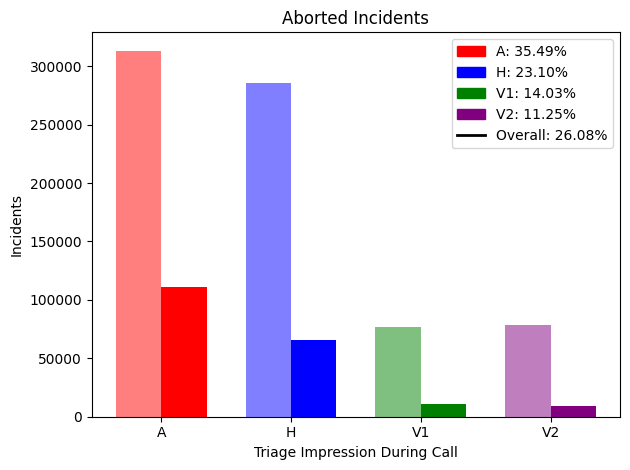

In [21]:
data_loader.processed_incidents_df = data_loader.processed_incidents_df[data_loader.processed_incidents_df["triage_impression_during_call"] != "V"]

data_loader.processed_incidents_df[data_loader.processed_incidents_df["triage_impression_during_call"].isna()].groupby("time_arrival_hospital").size()
total_counts = data_loader.processed_incidents_df.groupby('triage_impression_during_call').size()
nan_percentages = (nan_counts / total_counts * 100).fillna(0)
overall_nan_percentage = data_loader.processed_incidents_df['time_arrival_hospital'].isna().mean() * 100

lighter_colors = [plt.cm.colors.to_rgba(color, alpha=0.5) for color in constants.COLOR_MAPPING.values()]

# Set up the bar positions
bar_width = 0.35
index = range(len(total_counts))

# Plot the bars using specific colors
fig, ax = plt.subplots()

# Bars for total counts (lighter colors)
bar1 = ax.bar(index, total_counts, bar_width, color=lighter_colors)

# Bars for NaN counts (original colors)
bar2 = ax.bar([i + bar_width for i in index], nan_counts, bar_width, 
              color=[constants.COLOR_MAPPING[cat] for cat in nan_counts.index])

# Label the bars
ax.set_xlabel('Triage Impression During Call')
ax.set_ylabel('Incidents')
ax.set_title('Aborted Incidents')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(total_counts.index)

# Create the percentage labels dynamically and match with colors
labels = []
handles = []
for cat, pct in nan_percentages.items():
    labels.append('{0}: {1:.2f}%'.format(cat, pct))
    handles.append(plt.Rectangle((0, 0), 1, 1, color=constants.COLOR_MAPPING[cat]))
labels.append('Overall: {0:.2f}%'.format(overall_nan_percentage))
handles.append(plt.Line2D([0], [0], color='black', lw=2))

ax.legend(handles, labels)

plt.tight_layout()
plt.show()

# Plot enhanced data

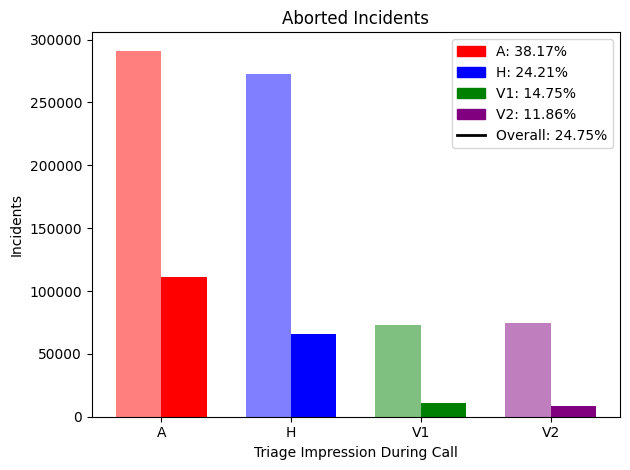

In [22]:
data_loader.enhanced_incidents_df = data_loader.enhanced_incidents_df[data_loader.enhanced_incidents_df["triage_impression_during_call"] != "V"]

data_loader.enhanced_incidents_df[data_loader.enhanced_incidents_df["triage_impression_during_call"].isna()].groupby("time_arrival_hospital").size()
total_counts = data_loader.enhanced_incidents_df.groupby('triage_impression_during_call').size()
nan_percentages = (nan_counts / total_counts * 100).fillna(0)
overall_nan_percentage = data_loader.enhanced_incidents_df['time_arrival_hospital'].isna().mean() * 100

lighter_colors = [plt.cm.colors.to_rgba(color, alpha=0.5) for color in constants.COLOR_MAPPING.values()]

# Set up the bar positions
bar_width = 0.35
index = range(len(total_counts))

# Plot the bars using specific colors
fig, ax = plt.subplots()

# Bars for total counts (lighter colors)
bar1 = ax.bar(index, total_counts, bar_width, color=lighter_colors)

# Bars for NaN counts (original colors)
bar2 = ax.bar([i + bar_width for i in index], nan_counts, bar_width, 
              color=[constants.COLOR_MAPPING[cat] for cat in nan_counts.index])

# Label the bars
ax.set_xlabel('Triage Impression During Call')
ax.set_ylabel('Incidents')
ax.set_title('Aborted Incidents')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(total_counts.index)

# Create the percentage labels dynamically and match with colors
labels = []
handles = []
for cat, pct in nan_percentages.items():
    labels.append('{0}: {1:.2f}%'.format(cat, pct))
    handles.append(plt.Rectangle((0, 0), 1, 1, color=constants.COLOR_MAPPING[cat]))
labels.append('Overall: {0:.2f}%'.format(overall_nan_percentage))
handles.append(plt.Line2D([0], [0], color='black', lw=2))

ax.legend(handles, labels)

plt.tight_layout()
plt.show()